# ANÁLISIS EXPLORATORIO DE DATOS
______

## Influencia del contexto económico en el logro educativo

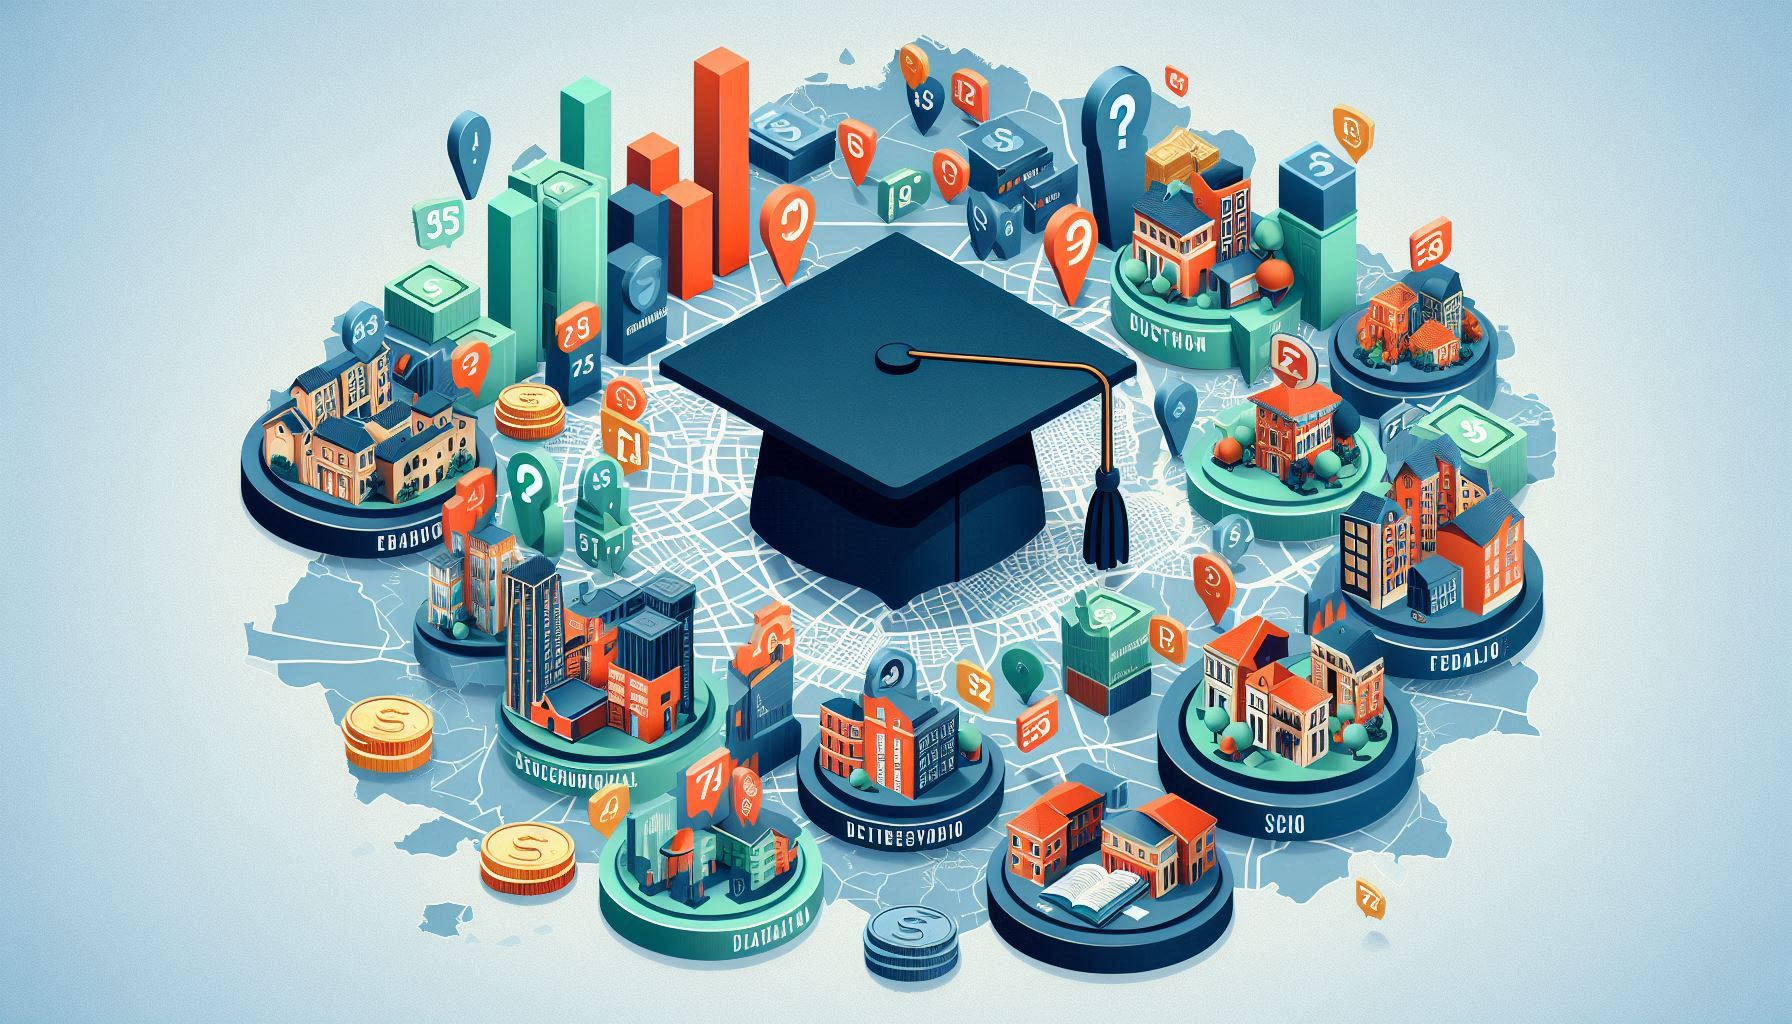

### **1. ¿Qué queremos descubrir?**

La **hipótesis** creada desde un inicio y antes de recabar los datos, ha ido marcada por la siguientes cuestiones:

- ¿Influye el nivel económico con los estudios?

- ¿Depende el distrito en dónde se viva a la hora de lograr estos estudios?



### **2. Recogida y limpieza de datos**

Para poder poner en práctica mi hipótesis y realizar de forma óptima el análisis, se necesitará una serie de datos.

Como quiero analizar los datos de **Madrid**, busco en páginas web relacionadas con el ayuntamiento de dicha ciudad.

Este análisis se va a basar en las **enseñazas obligatorias**:

- Primaria y ESO.

Y en los diferentes **distritos** de Madrid:

- Centro
- Arganzuela
- Fuencarral-El Pardo
- Moncloa-Aravaca
- Moratalaz
- Vicálvaro
- Puente de Vallecas
- Villa de Vallecas
- Usera
- Villaverde
- Tetúa
- Chamberí
- Chamartín
- Salamanca
- Retiro
- Hortaleza
- Barajas
- San Blas
- Ciudad Lineal
- Carabanchel
- Latina



#### *2.1. DATOS NECESARIOS*

- [Matriculados en primaria](https://estadisticas.educa.madrid.org/Report/ReportTemplate?ReportName=03_Alumnos_MatricPrimariaCursoSexo&ReportDescription=Alumnos%20matriculados%20en%20Educaci%C3%B3n%20Primaria%20por%20curso%20y%20sexo&Width=100&Height=650) teniendo la opción de elegir los años escolares y el distrito.

- [Matriculados en la ESO](https://estadisticas.educa.madrid.org/Report/ReportTemplate?ReportName=04_Alumnos_MatricSecundariaCursoSexo&ReportDescription=Alumnos%20matriculados%20en%20Educaci%C3%B3n%20Secundaria%20Obligatoria%20%28ESO%29%20por%20curso%20y%20sexo&Width=100&Height=650) teniendo las mismas opciones que el anterior.

- Es necesario saber la [tasa de idoneidad](https://estadisticas.educa.madrid.org/Report/ReportTemplate?ReportName=27_TasasIdoneidad_EducObligatoriaEdadSexo&ReportDescription=Tasas%20de%20idoneidad%20en%20Educaci%C3%B3n%20Obligatoria%20por%20edad%20y%20sexo&Width=100&Height=650) en la educación obligatoria, es decir, qué porcentaje de alumnos progresan en sus estudios dependiendo del curso.

- Para poder analizar por completo mi hipótesis, necesito los [datos económicos por distritos](https://datos.madrid.es/sites/v/index.jsp?vgnextoid=71359583a773a510VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD).

Realizaré el análisis en base a dos años en concreto:

- **2014** -> Teniendo una referencia de antes de la pandemia mundial.

- **2020** -> Si ha habido alguna diferencia significativa después de pasar el confinamiento.

#### *2.2. LIMPIEZA DE DATOS*

***LIMPIEZA DATOS DE PRIMARIA***

En primer lugar, estuve descargando los archivos relacionados con los datos de los alumnos **matriculados en primaria**.

Cada archivo era una tabla de un distrito y de un curso escolar, por lo que estuve descargando uno por uno todos los archivos de todos los distritos y de los dos cursos escolares que me interesaban

Una vez descargado lo cargué como un archivo csv para visualizar las tablas y ver qué datos hay que limpiar para solo tener los que me interesan

Un ejemplo de esas tablas es:

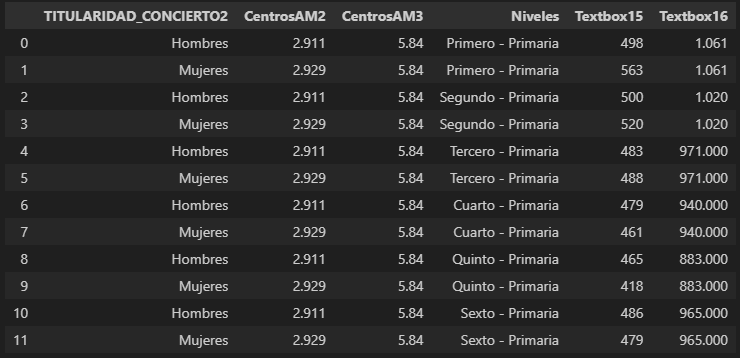

Analizándolo observamos:

- Elimino la columna `TITULARIDAD_CONCIERTO2` ya que no vamos a distinguir por género.

- La columna `CentrosAM2` hace referencia al número total de hombres matriculados y `CentrosAM3` total de mujeres. Como no vamos a usar esos datos, lo elimino.

- La columna `Textbox15` es la cantidad de hombres y mujeres que hay por cada nivel, como no queremos usarlo lo eliminamos también.

- En cambio, la columna `Textbox16` es el total de personas matriculadas por cada nivel. Esa variable SÍ es necesario por lo que únicamente cambio el nombre por `Total`.

- Además, no quiero que haya duplicados y los eliminaré.

- Añadiré dos columnas más: `Distrito` y `Curso_escolar`.

Todo esto lo modifiqué con la creación de una función para todas los datos de cada distrito

Un *aspecto a resaltar* fue que los datos numéricos estaban mezclados con '.' lo que eran millar (1.920 --> mil novecientos veinte) y los que eran centenas con decimal (849.000 --> ochocientos cuarenta y nueve). Creé una función para sustuir esos puntos por un espcio en blanco para que, a la hora de realizar alguna operación, no hubiese ninguna dificultad. 

A raíz de este problema con los datos, al convertir estas cifras, los 0 del final de los números de tipo millar, se eliminaban (1.230 --> 123), y los de tipo centena se sumaba un 0 (987.000 -> 9870), por lo que fui modificándolos manualmente para tener los datos correctos.

Una vez limpios los datos, el aspecto de la tabla es la siguiente:

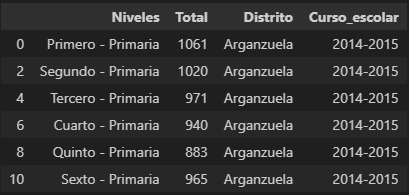

Cuando finalicé de limpiar los datos de primaria **concatené** todas las tablas en una sola y lo guardé en un archivo **.json**

***LIMPIEZA DATOS DE ESO***

Seguí el mismo procedimiento que con las tablas de Primaria ya que seguía la misma estructura por lo que utilicé las mismas funciones para limpiar los datos.

También los concatené en una sola tabla y a su vez uní las dos tablas, la de Primaria y la de la ESO.

***LIMPIEZA DATOS DE LA TASA DE IDONEIDAD***

Para descargar los archivos utilicé el mismo procedimiento que los anteriores.

Sin embargo, como mostraban otros datos, la tabla tenía un diseño diferente:

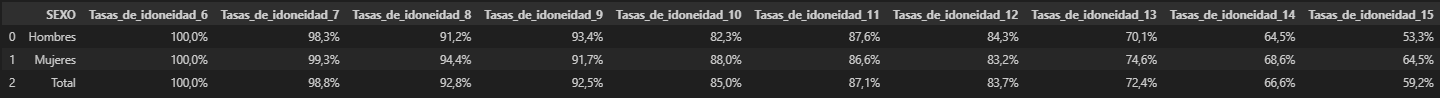

Analizando los datos, saqué estas conclusiones:

- Elimino la columna `SEXO` ya que, como he indicado anteriormente, no voy a centrar mi análisis en el género.

- Elimino la primera y la segunda fila de la tabla ya que corresponden a los datos de los hombres y de las mujeres.

- Traspongo la tabla para que se quede en una columna los datos de la tasa de idoneidad poniendo como nombre de estos valores `Total` y, en ota columna los niveles educativos que en este caso corresponde con la edad, siendo Tasa_idoneidad_6 como primero de primaria y así sucesivamente hasta llegar a cuarto de la ESO. Esta última columna cambió su nombre a `Tasas`.

- Además, para que la columna de `Total` pueda ser de tipo numérica y así poder realizar operaciones, elimino el signo '%' y la ',' por '.' para hacerlo de tipo decimal (float) convirtiéndolo en este tipo de objeto.

Para poder realizar todos estos cambios y limpiar estos datos, creé una función para poder hacerlo en las tablas de cada distrito y de cada año.

Se vería, una vez limpia, de la siguiente manera:

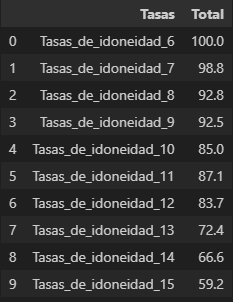

Cuando ya están limpios todos los datos de cada tabla de idoneidad, cargo la **tabla principal** donde tengo los valores tanto de Primaria como de la ESO.

En esta tabla creo una columna llamada `Tasa_idoneidad_%` con los datos vacíos.

Una vez creada esta columna comienzo a añadir los datos de las tasas de idoneidad de cada distrito y de cada año, pero ¿cómo lo hago? Elaborando una función de la siguiente forma:

- En esta función se le añade como parámetros la tabla principal, la tabla de cada distrito y de cada año, un valor que indique el curso y otro el distrito.

- Dentro de la función:

    - Se filtrará, de la tabla principal, el curso y el distrito dados en la función.

    - Creará una lista con los niveles únicos, sin duplicados.

    - Creará un diccionario vacío para ir agrupando por índice y nivel educativo.

    - Una vez creado y relleno este diccionario con un bucle, localizo el índice de la tabla filtrada por distrito y año dados en la función y añado en la columna de idoneidad los datos de la tabla de dicha tasa creando a su vez otra función para sacar los datos de la tasa de cada nivel.

Una vez finalizada la limpieza de datos y añadido todos a la tabla principal, quedaría de esta manera:

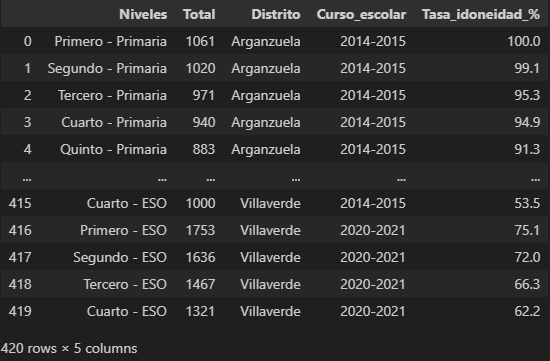

***OBTENCIÓN DE LOS DATOS ECONÓMICOS***

Estos datos son obtenidos de un archivo tipo EXCEL donde recoge valores como la superficie, la densidad de población, la población del distrito(su estructura, los hogares, la dinámica demográfica, etc.), los **indicadores económicos** (lo que nos interesa), los indicadores de desempleo... entre otros aspectos.

Para obtener los datos de cada año, necesito dos tablas EXCEL donde en cada una tienen diferentes hojas de EXCEL donde cada una de ellas es cada uno de los distritos.

Por lo que para tener los datos económicos de cada distrito creo **dos funciones** (una por cada año) que elabore lo siguiente:

- Cada función se tiene que introducir una variable de tipo numérico donde guardaremos ahí el dato económico, y como segundo parámetro el distrito donde queramos obtener la información.

- Dentro de la función, cargará la tabla con toda la información del ditrito reflejado en el parámetro.

- Guardamos en la variable dada, la localización del dato económico.

Una vez guardado todos los datos económicos de cada distrito y de cada año, primero guardo en una tabla todos los datos del 2014, repitiendo el mismo proceso con los datos del 2020, finalizándolo en una tabla ambos datos, quedando de la siguiente forma:



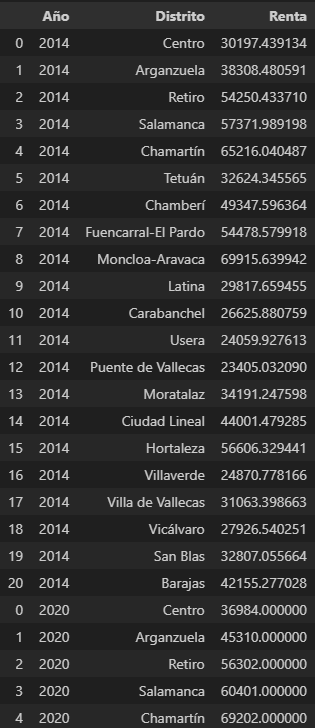

### **3. Categorización y clasificación de las variables**


#### *3.1. CATEGORIZACIÓN DE LAS VARIABLES*

Para poder elaborar un análisis correcto y comprensible, es recomendable realizar una **categorización** de las varaibles.

Las variables que vayamos utilizar se pueden categorizar como:

- *Categóricas* --> aquellas variables en forma de texto que contegan un número bajo de valores únicos.

- *Binaria* --> variables con dos valores únicos.

- *Numéricas* --> aquellas variables de tipo numérica para poder realizar operaciones.

Para poder hacerlo de forma más sencilla, creo una función para categorizar las dos tablas principales que poseo quedándose de la siguiente manera:


***TABLA DE ESTUDIOS***

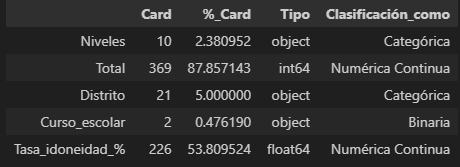

***TABLA DE LA RENTA MEDIA ANUAL***

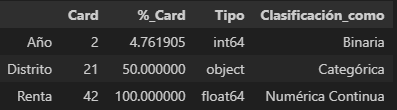

#### *3.2. CLASIFICACIÓN DE LAS VARIABLES*

Una vez categorizadas, vamos a **clasificarlas** describiendo cada variable, reflejando el tipo y su nivel de importancia siendo el 1 la variable con más importancia o variable directora.

***TABLA DE ESTUDIOS***

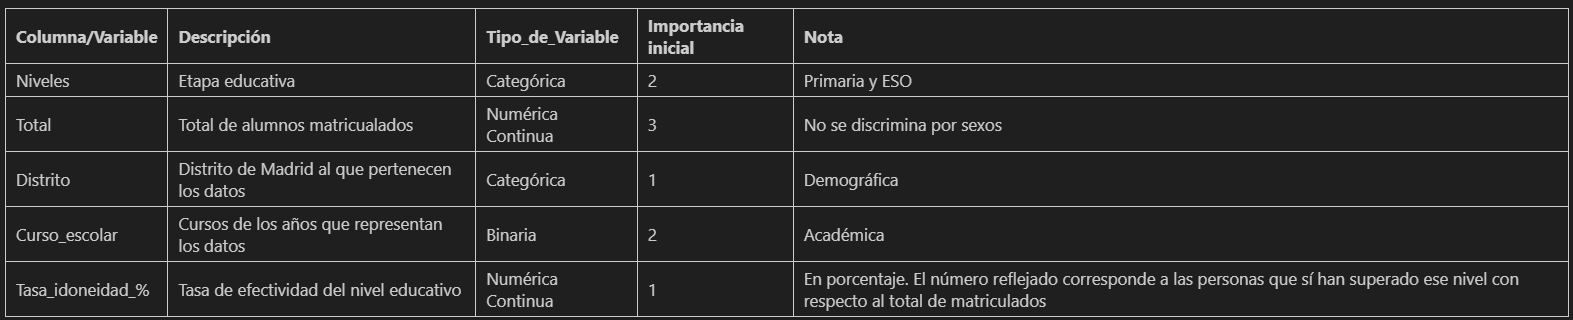

***TABLA DE LA RENTA MEDIA ANUAL***

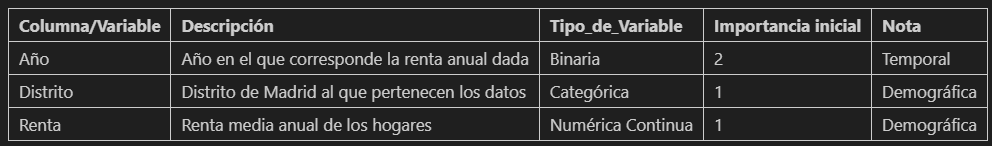

### **4. ANÁLISIS DE LAS VARIABLES**


#### *4.1. ANÁLISIS DE LA TABLA DE ESTUDIOS*

***ANÁLISIS DESCRIPTIVO DE LAS VARIABLES NUMÉRICAS***

En este análisis descriptivo, obtendremos los resultados de las variables numéricas de la **tabla de estudios**: `Total` y `Tasa_idoneidad_%`.

Estos resultados estarán relacionados con:

- Cantidad única de valores (*count*)

- Media de los valores (*mean*)

- Desviación estándar (*std*)

- Valor mínimo (*min*)

- Percentil 25, el valor que están justo en el 25% del total de todos los valores (*25%*)

- Percentil 50, el valor que está justo en el 50% del total de todos los valores (*50%*)

- Percentil 75, el valor que está justo en el 75% del total de todos los valores (*75%*)

- Valor máximo (*max*)

Por lo tanto, los resultados para la variable `Total` es:

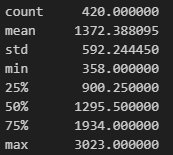

- *Se puede observar que los datos no están muy dispersos ya que la media y la mediana, en este caso el percentil 50, tiene cierto grado de similitud*
- *Además, también se aprecia que entre el máximo y el percentil 75 sí existe cierta distancia. ¿Se puede intuir que hay algún dato destacable?*

Y, estos son los resultados para la variable `Tasa_idoneidad_%`:

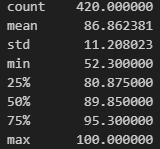

- *Teniendo una media de 86% de los alumnos que superan el nivel y con un percentil 50 (mediana) del 89%, se observa que los datos no están muy dispersos*
- *Además, entre el máximo (100%, queriendo decir que hay alguna etapa que es superada por todos los alumnos), y el percentil 75 (95%), hay muy poca diferencia*
- *También, podemos ver que el mínimo está en el 52,3%, por lo que hay una etapa educativa que han superado los estudios la mitad de los alumnos matriculados, dato curioso que habrá que analizar*

***ANÁLISIS DE LA VISUALIZACIÓN DE MANERA UNIVARIANTE DE LAS VARIABLES NUMÉRICAS***

Crearemos de manera inidivudal gráficas como **histogramas** como **diagrama de cajas**, para ver la dispersión de los datos y si hay alguno más significativo, llamados *outliers*.


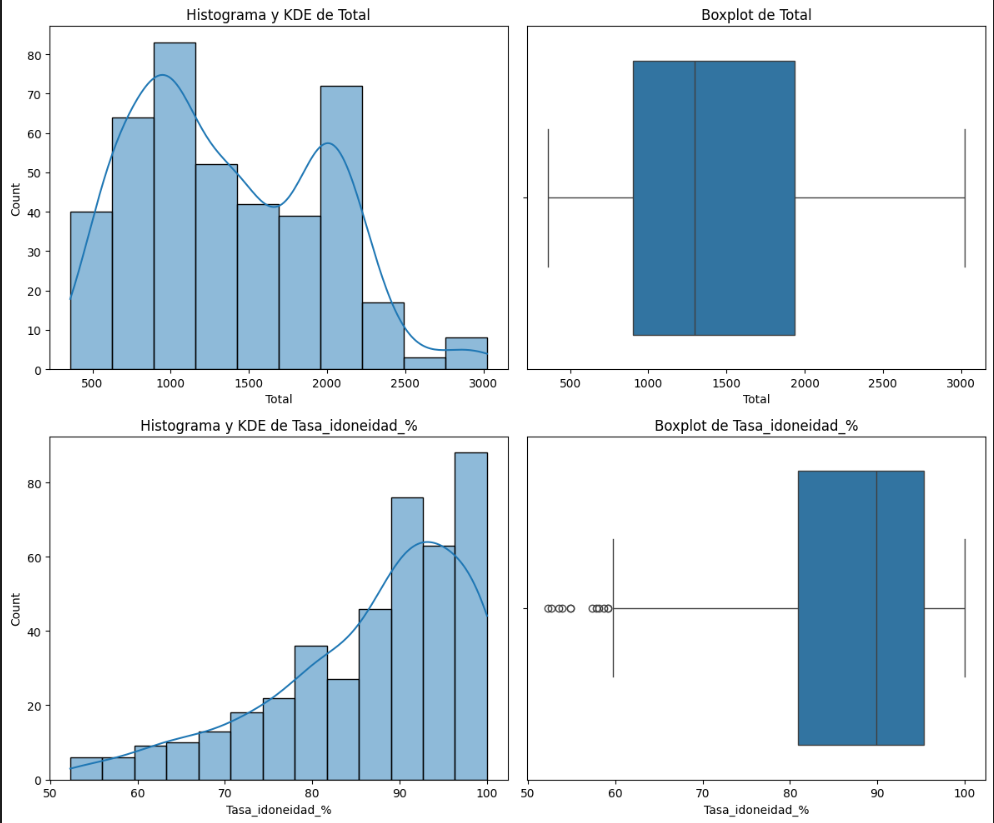

*En la variable `Total`*:
- *Con estos gráficos se verifica que no hay datos dispersos, concentrándose en el rango entre 900 y 2000. Además, aunque la longitud entre el máximo y el percentil 75 sea un poco alta, no se observan outliers*

*En la variable `Tasa_idoneidad_%`:*
- *Se observa, en el diagrama de cajas, que hay una serie de outlier por debajo del 60%, esto significa que hay en algún nivel que no supera los estudios la mitad del alumnado matriculado. Esto es una buena observación para preguntarnos si está relacionado con el nivel económico de las familias y el distrito*

***ANÁLISIS ENTRE LAS VARIABLES NUMÉRICAS Y CATEGÓRICAS***

Como las variables categóricas por sí solas no muestran unos resultados útiles, comenzaré a combinarlas entre las numéricas.

> Primero quiero visualizar en una gráfica el número total de matriculados en cada nivel dependiendo del curso escolar.

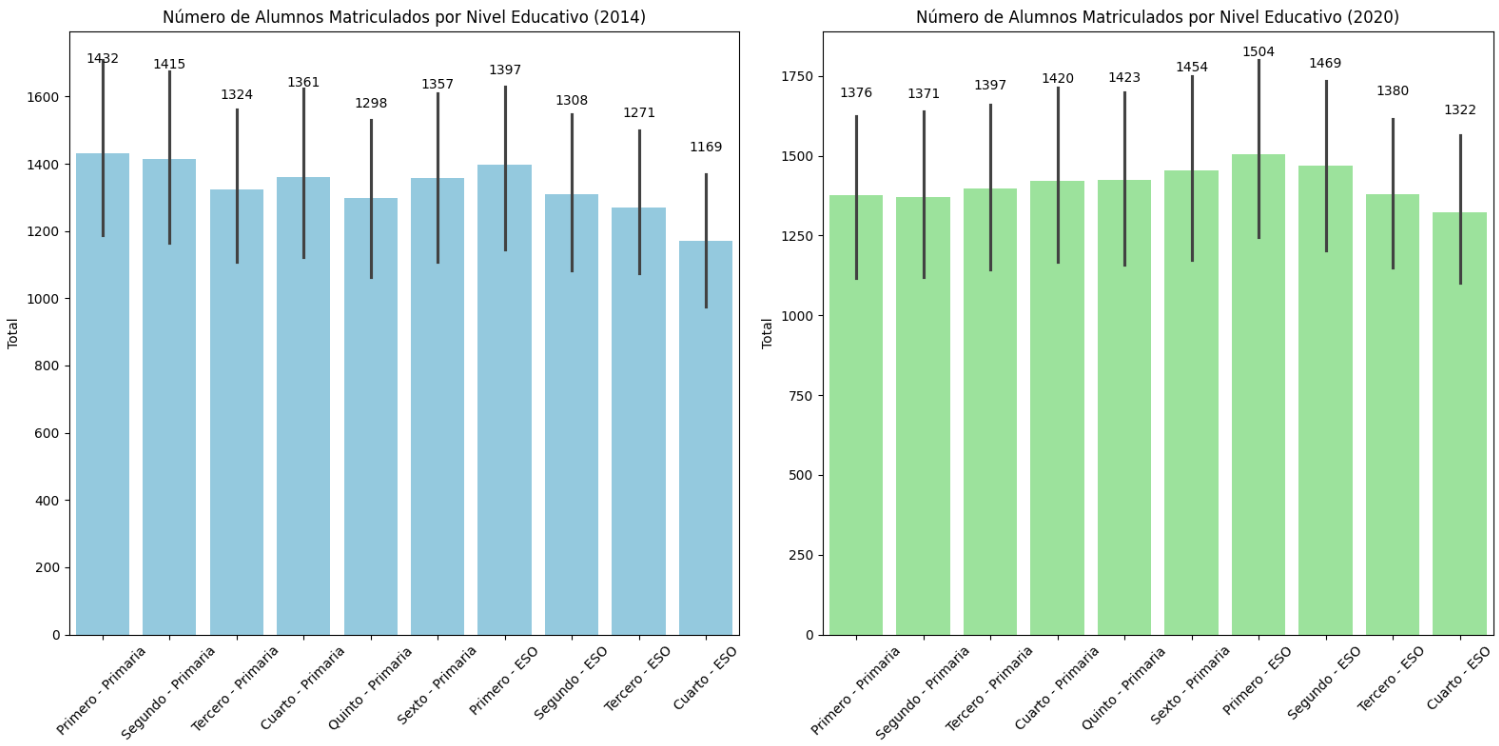

- *No se muestra nada significativo entre las dos gráficas, únicamente que respecto a un año y a otro hay una bajada en la primera etapa (PRIMARIA) y una subida consierable en la segunda etapa (ESO). ¿Puede ser por la pandemia? Entraría en juego otras variables como el número de nacimientos. **Por lo tanto, descarto esta gráfica para mi hipótesis***

> A continuación visuaizaremos el número de matriculados por distrito según el curso escolar.

Como hay 21 distritos, sería complicado visualizarlos todos en una gráfica o en varias para poder analizarlo, por lo que realizaremos un top 7 de más alumnos matriculados en total y un top 7 de menos matriculados.

- Gráfica de los 7 distritos con más alumnos matriculados:

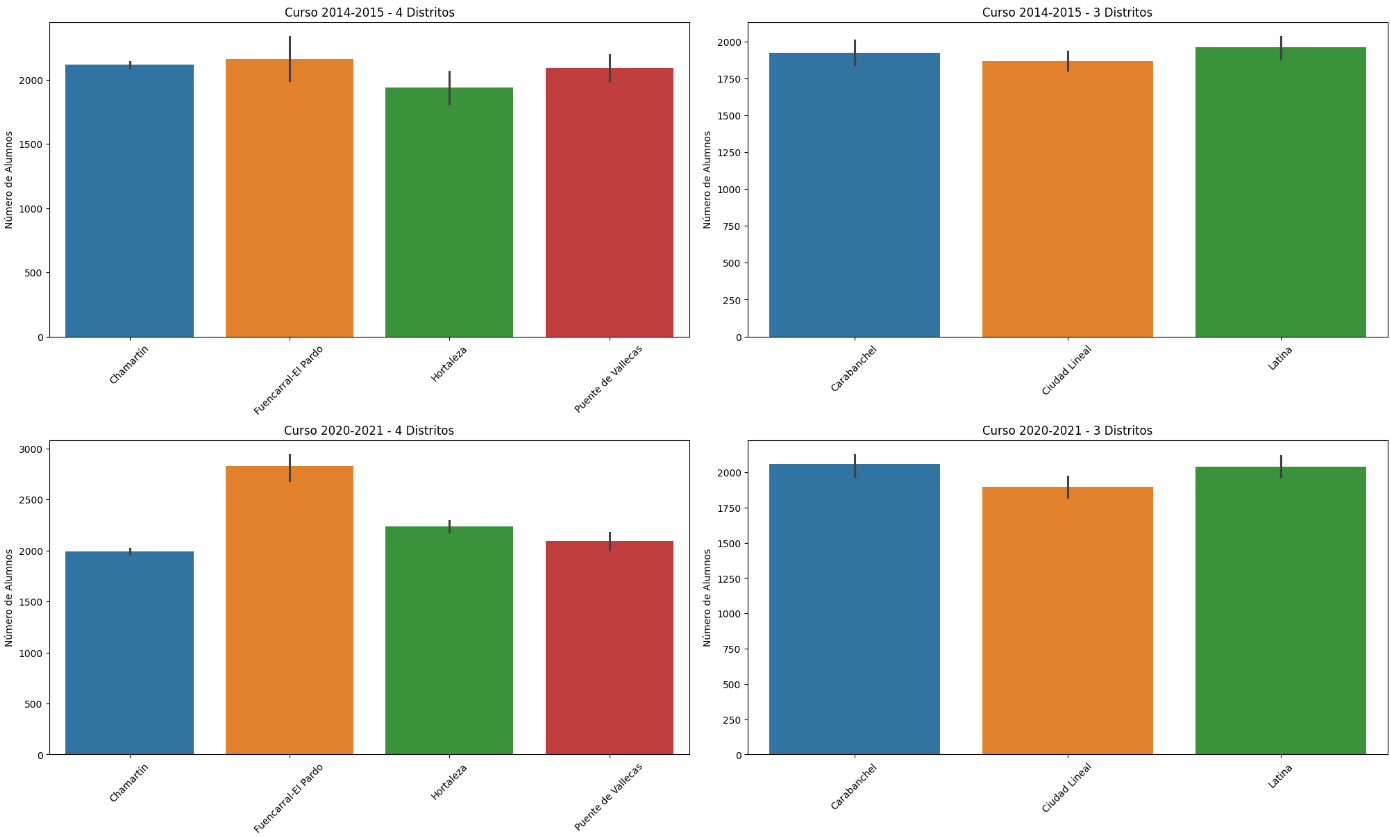

*Fuencarral-el Pardo, en los dos cursos es el distrito con más alumnos en los dos cursos, pero... ¿y qué distrito es el que menos alumnos matriculados tiene por cada curso?*


- Gráfica de los 7 distritos con menos alumnos matriculados:

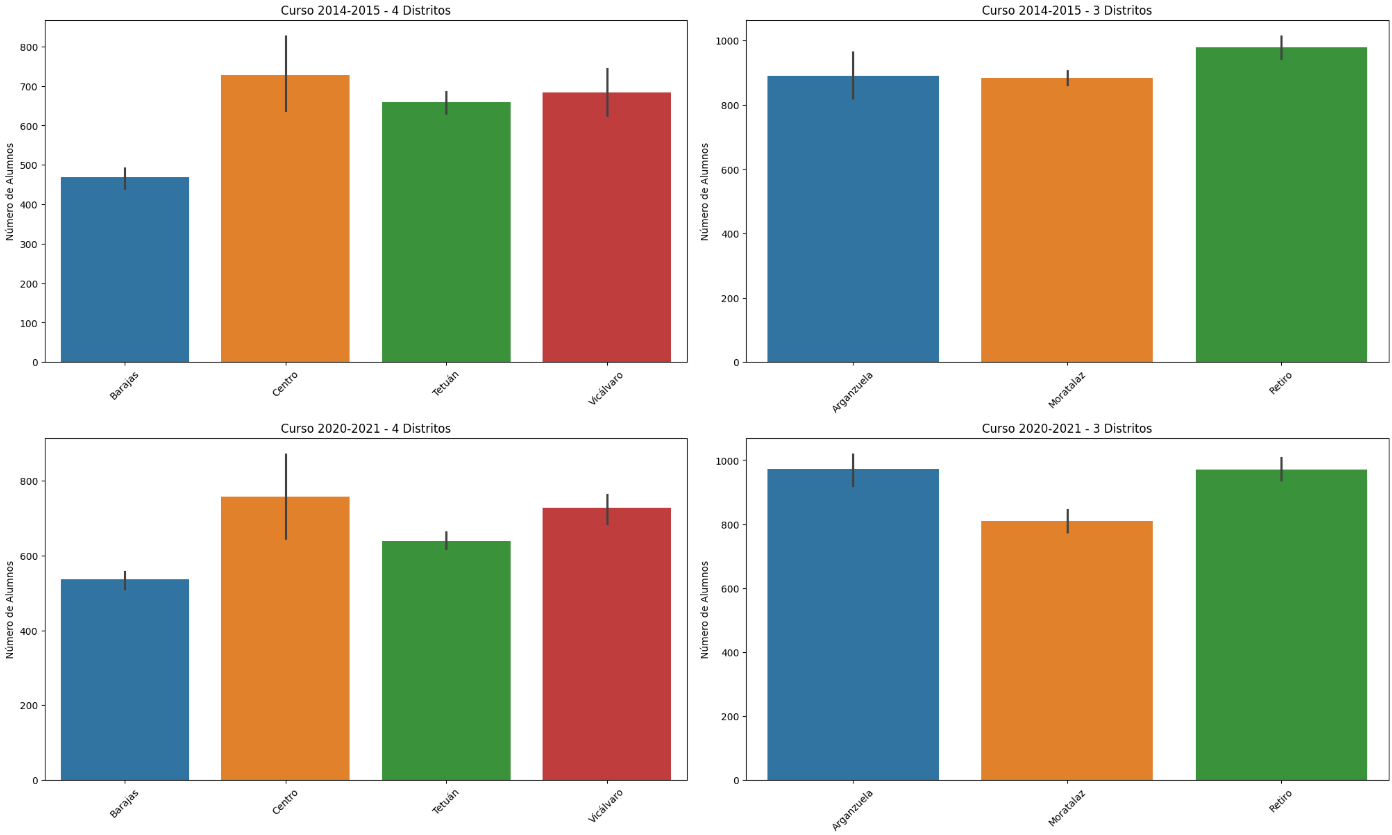

*El distrito que menos alumnos tiene por cada curso es el de Barajas. Estos datos pueden indicar que en estas zonas, tanto el distrito que más alumnos se ha matriculado como el que menos, seguramente dependa de la densidad de población. Por lo que este indicador no nos interesa demasiado. **Por lo que estas gráficas, tanto el de más alumnos como el que menos, no nos influye a la hora de analizar nuestra hipótesis***

> Ahora analizaremos la tasa de idoneidad por cada nivel educativo y por cada año.

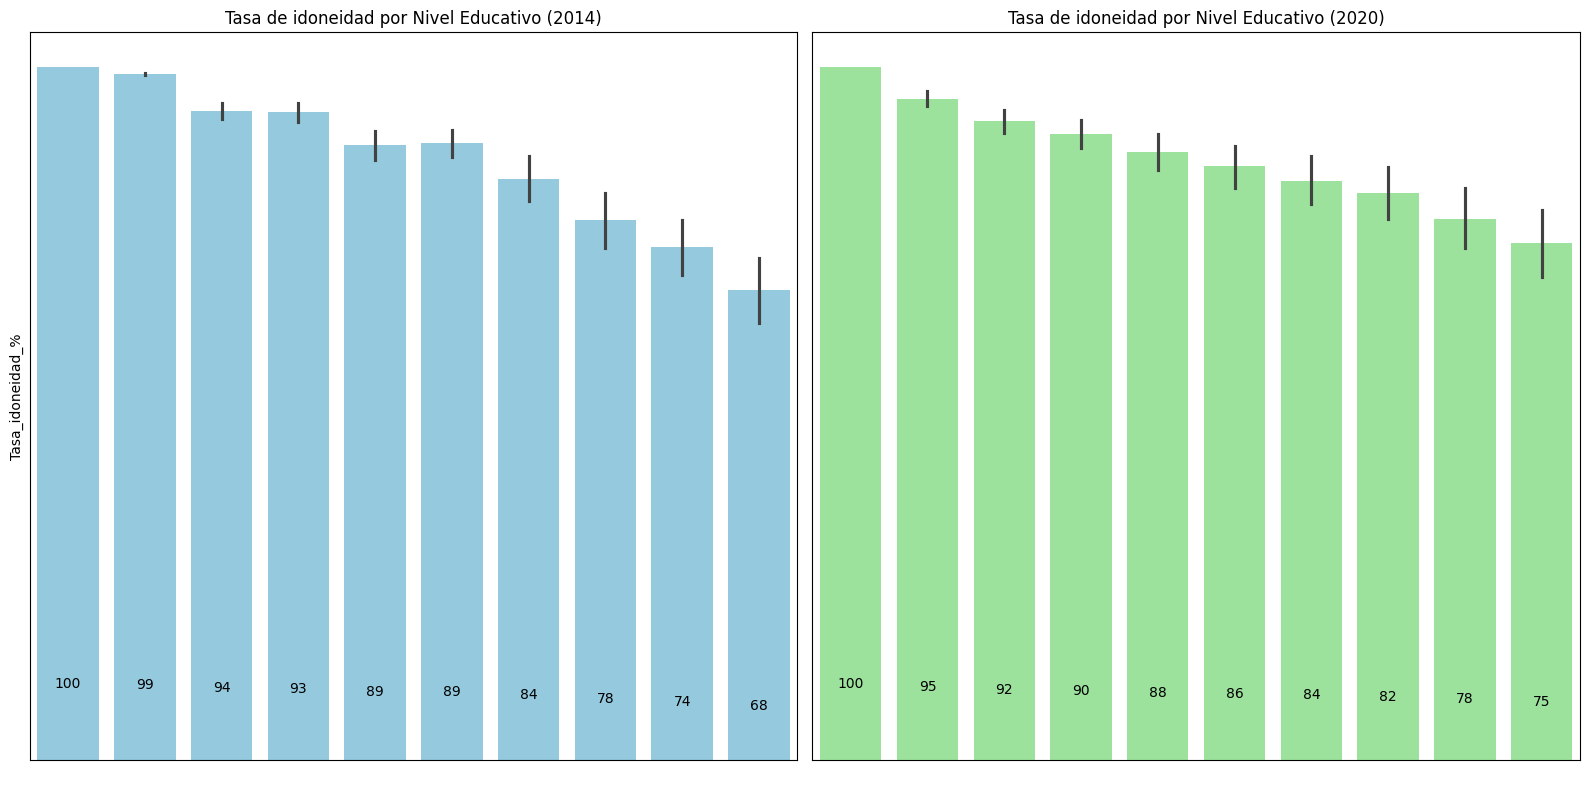

*Se observa que según se avanza en los nivles educativos, por norma general, va disminuyendo esa tasa de idoneidad, es decir, va aumentando la cantidad de alumnos que repite en cada etapa. Esto puede deberse, entre otras cosas, por la dificultad que conlleva cada nivel. A más nivel, más dificultad.*

*Esto es un análisis por niveles, pero...¿influirá la renta de las familias?*

#### *4.2. ANÁLISIS DE LA TABLA DE RENTA*

***ANÁLISIS DESCRIPTIVO DE LA VARIABLE `Renta`***

Como hemos realizado con la tabla de estudios, haremos lo mismo con la variable numérica de la tabla renta que, en este caso, es `Renta`:

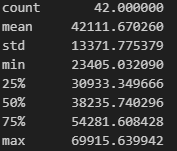

*Aquí observamos las rentas de manera conjunta, aunando los dos años. Observamos que la media (42111.67) y el percentil 50 (38236.74) hay una ligera dispersión. Y entre el máximo (69915.63) y el percentil 75 (54281.60) hay más diferencia que el anterior por lo que puede haber una dispersión en los datos*

***ANÁLISIS DE LA VISUALIZACIÓN DE MANERA UNIVARIANTE DE LA VARIABLE `Renta`***

Para poder ver mejor si hay una dispersión en los datos, veremos visualmente como se concentran.

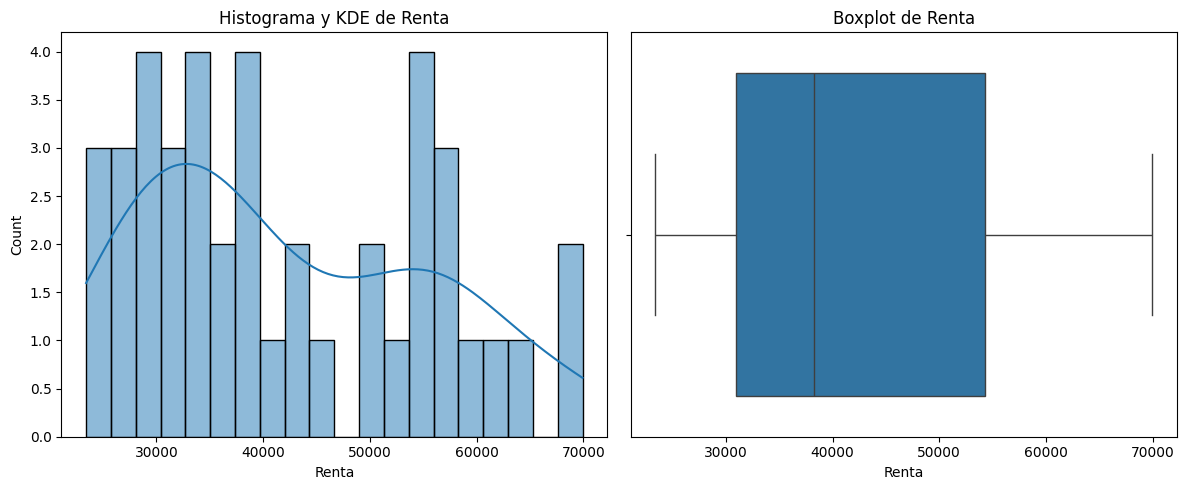

- *Gracias a estas gráficas, podemos ver que hay diferentes picos de concentración, uno entre 20k y 40k, otro grupo entre los 50k y 60k y uno pequeño superando los 65k.*

- *Con el diagrama de cajas, no hay outliers por lo que no hay ningún dato que destaque ni por ser muy alto ni muy bajo*.

- *En definitiva, lo datos están concentrados en diferentes puntos de la gráfica pero su dispersión no es muy notable.*

***ANÁLISIS ENTRE LAS VARIABLES NUMÉRICAS Y CATEGÓRICAS***

Analizaremos la renta por cada año y así veremos mucho mejor las diferencias

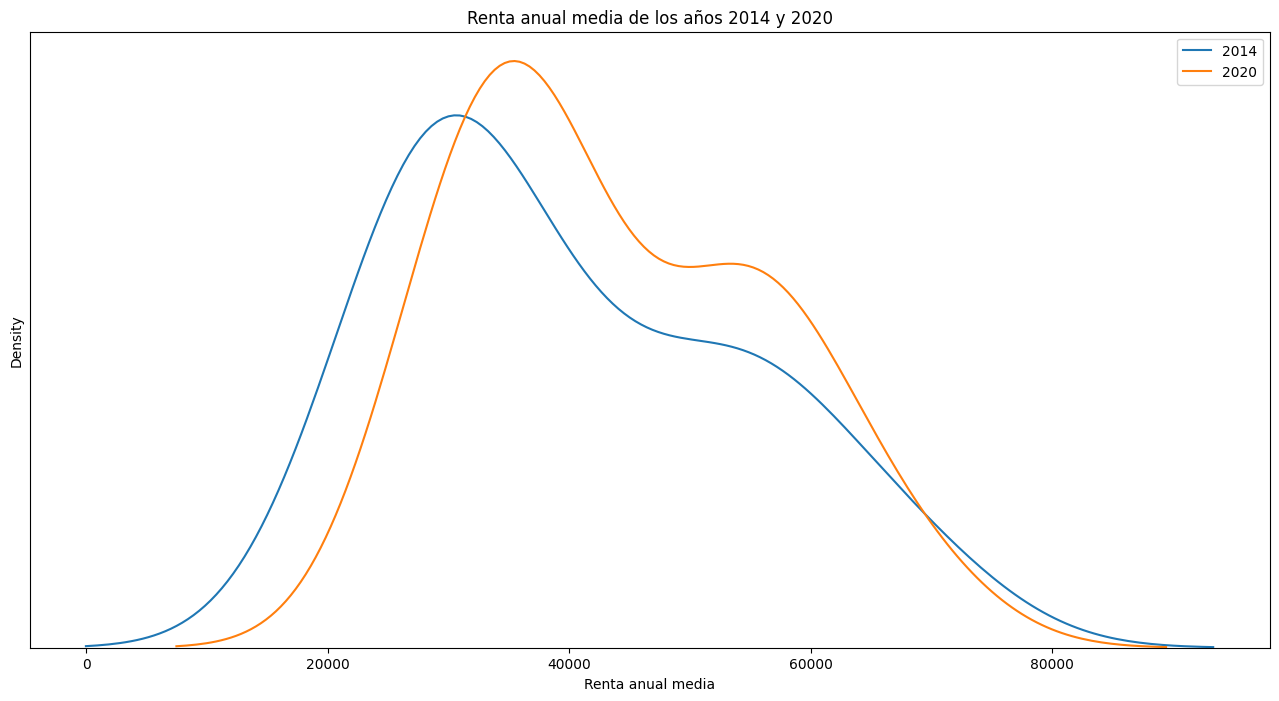

*Se pueden observar datos muy interesantes*:

- *En el año 2014, comenzaban teniendo una renta más baja que en el 2020* 

- *Se ve un incremento de salarios entre 30k y 40k entre ambos años, quedándose estable entre los 40k y 50k*

- *En 2020 hay un pico muy significativo entre los 50k y 60k con respecto al 2014*

- *En general, con lo que muestra esta gráfica ha habido un enriquecimiento desde el 2014 al 2020*

*¿Se mostrará parecido diferenciando por distritos?*

#### *4.3. ANÁLISIS ENTRE AMBAS TABLAS*

> Una vez analizadas nuestras dos variables directoras de manera individual (`tasa_idoneidad_%` y `Renta`), vamos a crear una **gráfica de dispersión** relacionándolas entre sí dependiendo del nivel educativo.

Para poder comparar ambas tablas tengo que unificarlas creando otra columna en la tabla de estudios llamada `Año` quedándome con el primer año que se muestra en la columna `Curso_escolar`. Por ejemplo: el valor 2014-2015, reflejaría en `Año` 2014.

De esta manera, se pueden unir la tabla renta y la de estudios y así relacionarlas entre sí.

Para que se pueda ver de manera más comprensible, creamos otra columna llamada `Categoría_Nivel`, clasificando por Primaria y ESO los niveles a que corresponda cada nivel.

Por lo que se vería la gráfica de la siguiente forma:

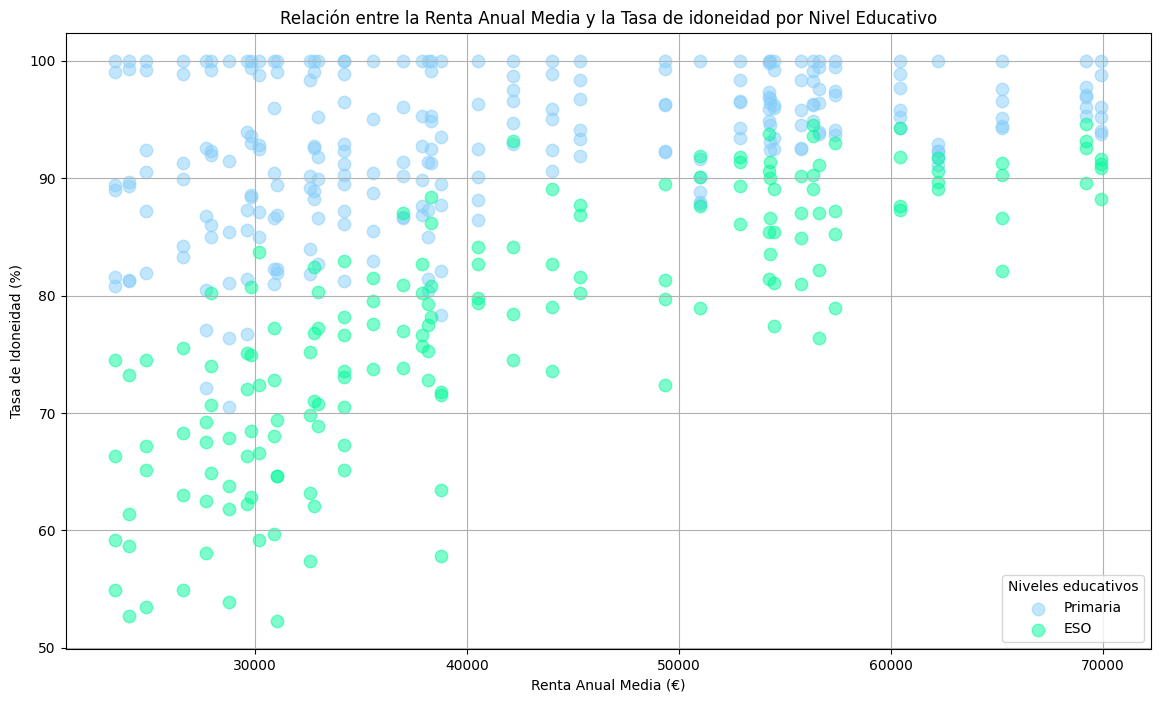

*Se puede observar perfectamente que las rentas de más de 40k comienzan a tener una tasa de idoneidad alta independientemente del curso, siempre siendo el último curso el más dificil. La forma de relación que tiene los puntos se puede decir que hay una correlación poitiva, es decir, según va aumentando la renta, aumenta la tasa de idoneidad.*

*Y, ¿cómo será esta distribución con los distritos?*

> Analizamos en un primer lugar la renta media anual y los distritos.

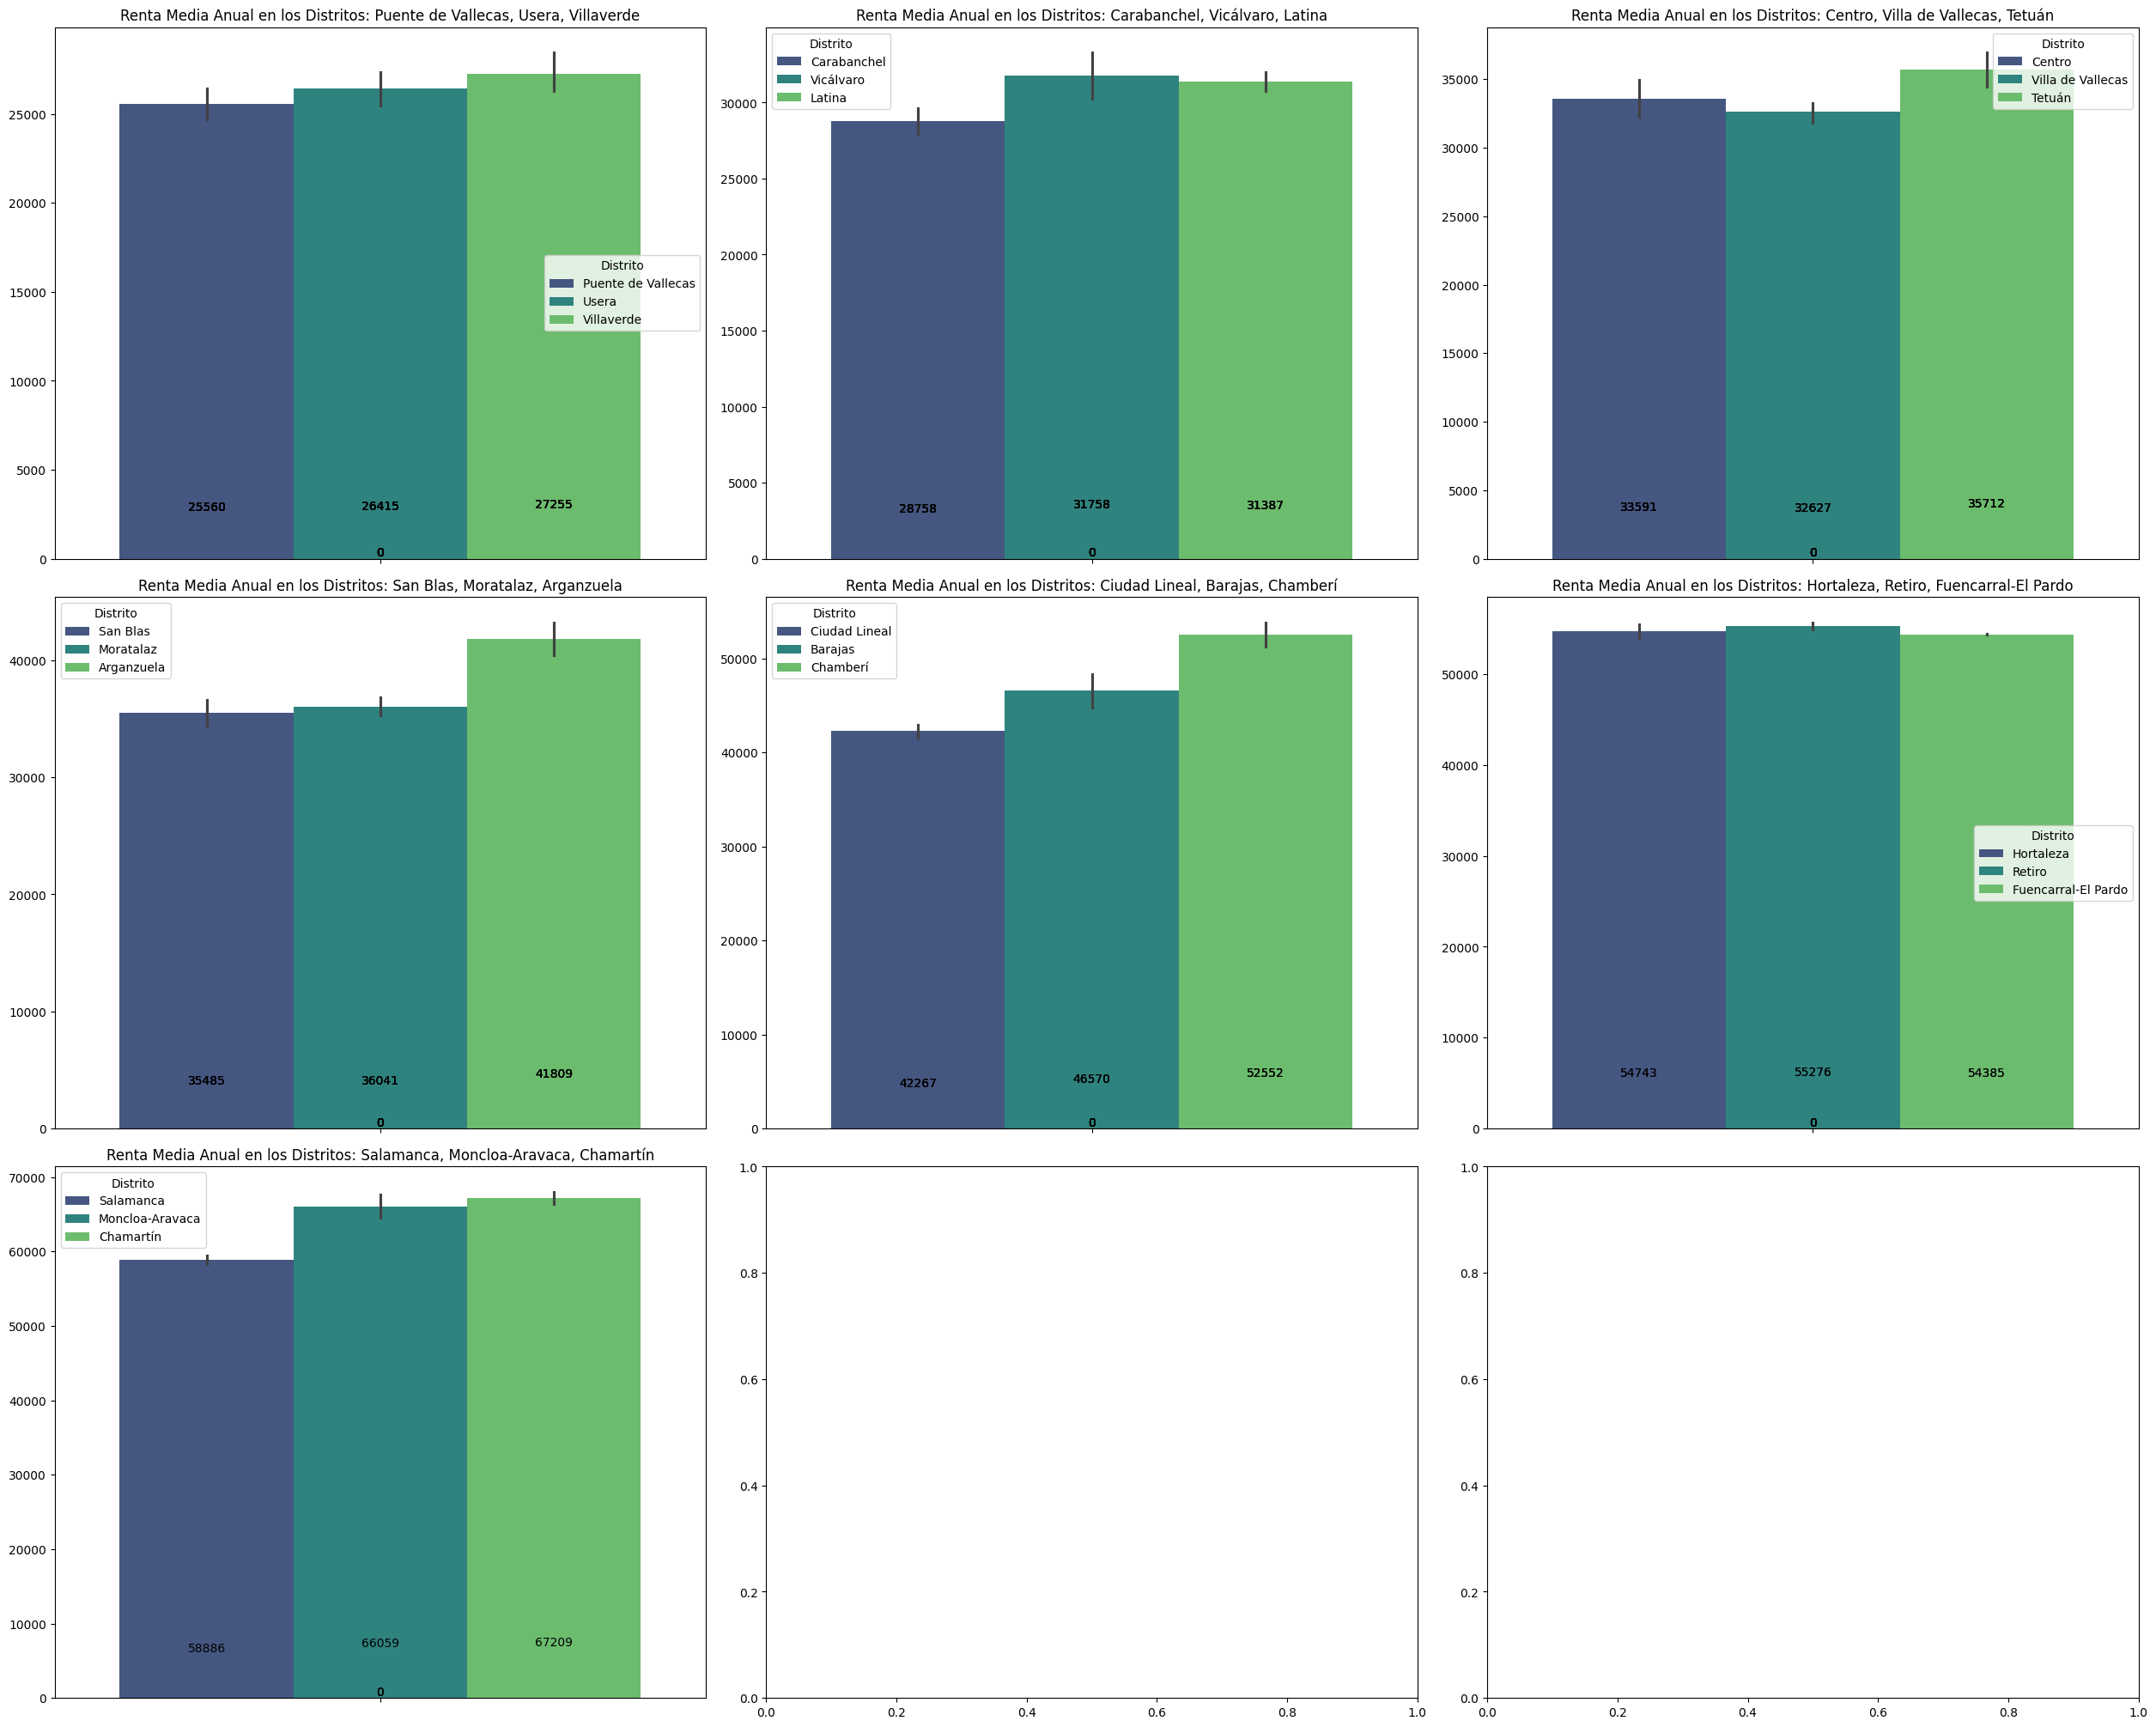

*Esta gráfica muestra, en conjunto, la totalidad de los dos años. Está organizado de tal manera que los primeros distritos que se ven son los que menos renta tienen y los últimos los que más. Por lo que los tres distritos que menos renta anual tienen son: Puente de Vallecas, Usera y Villaverde. Y los que más ingresan son: Barrio de Salamanca, Moncloa-Aravaca y Chamartín.*

*Estos distritos influyendo en el nivel socioeconómico puede deberse por muchos factores, entre otros, por el nivel de adquisición de la vivienda*

> Ahora podremos analizar cómo ha cambiado entre el 2014 y el 2020

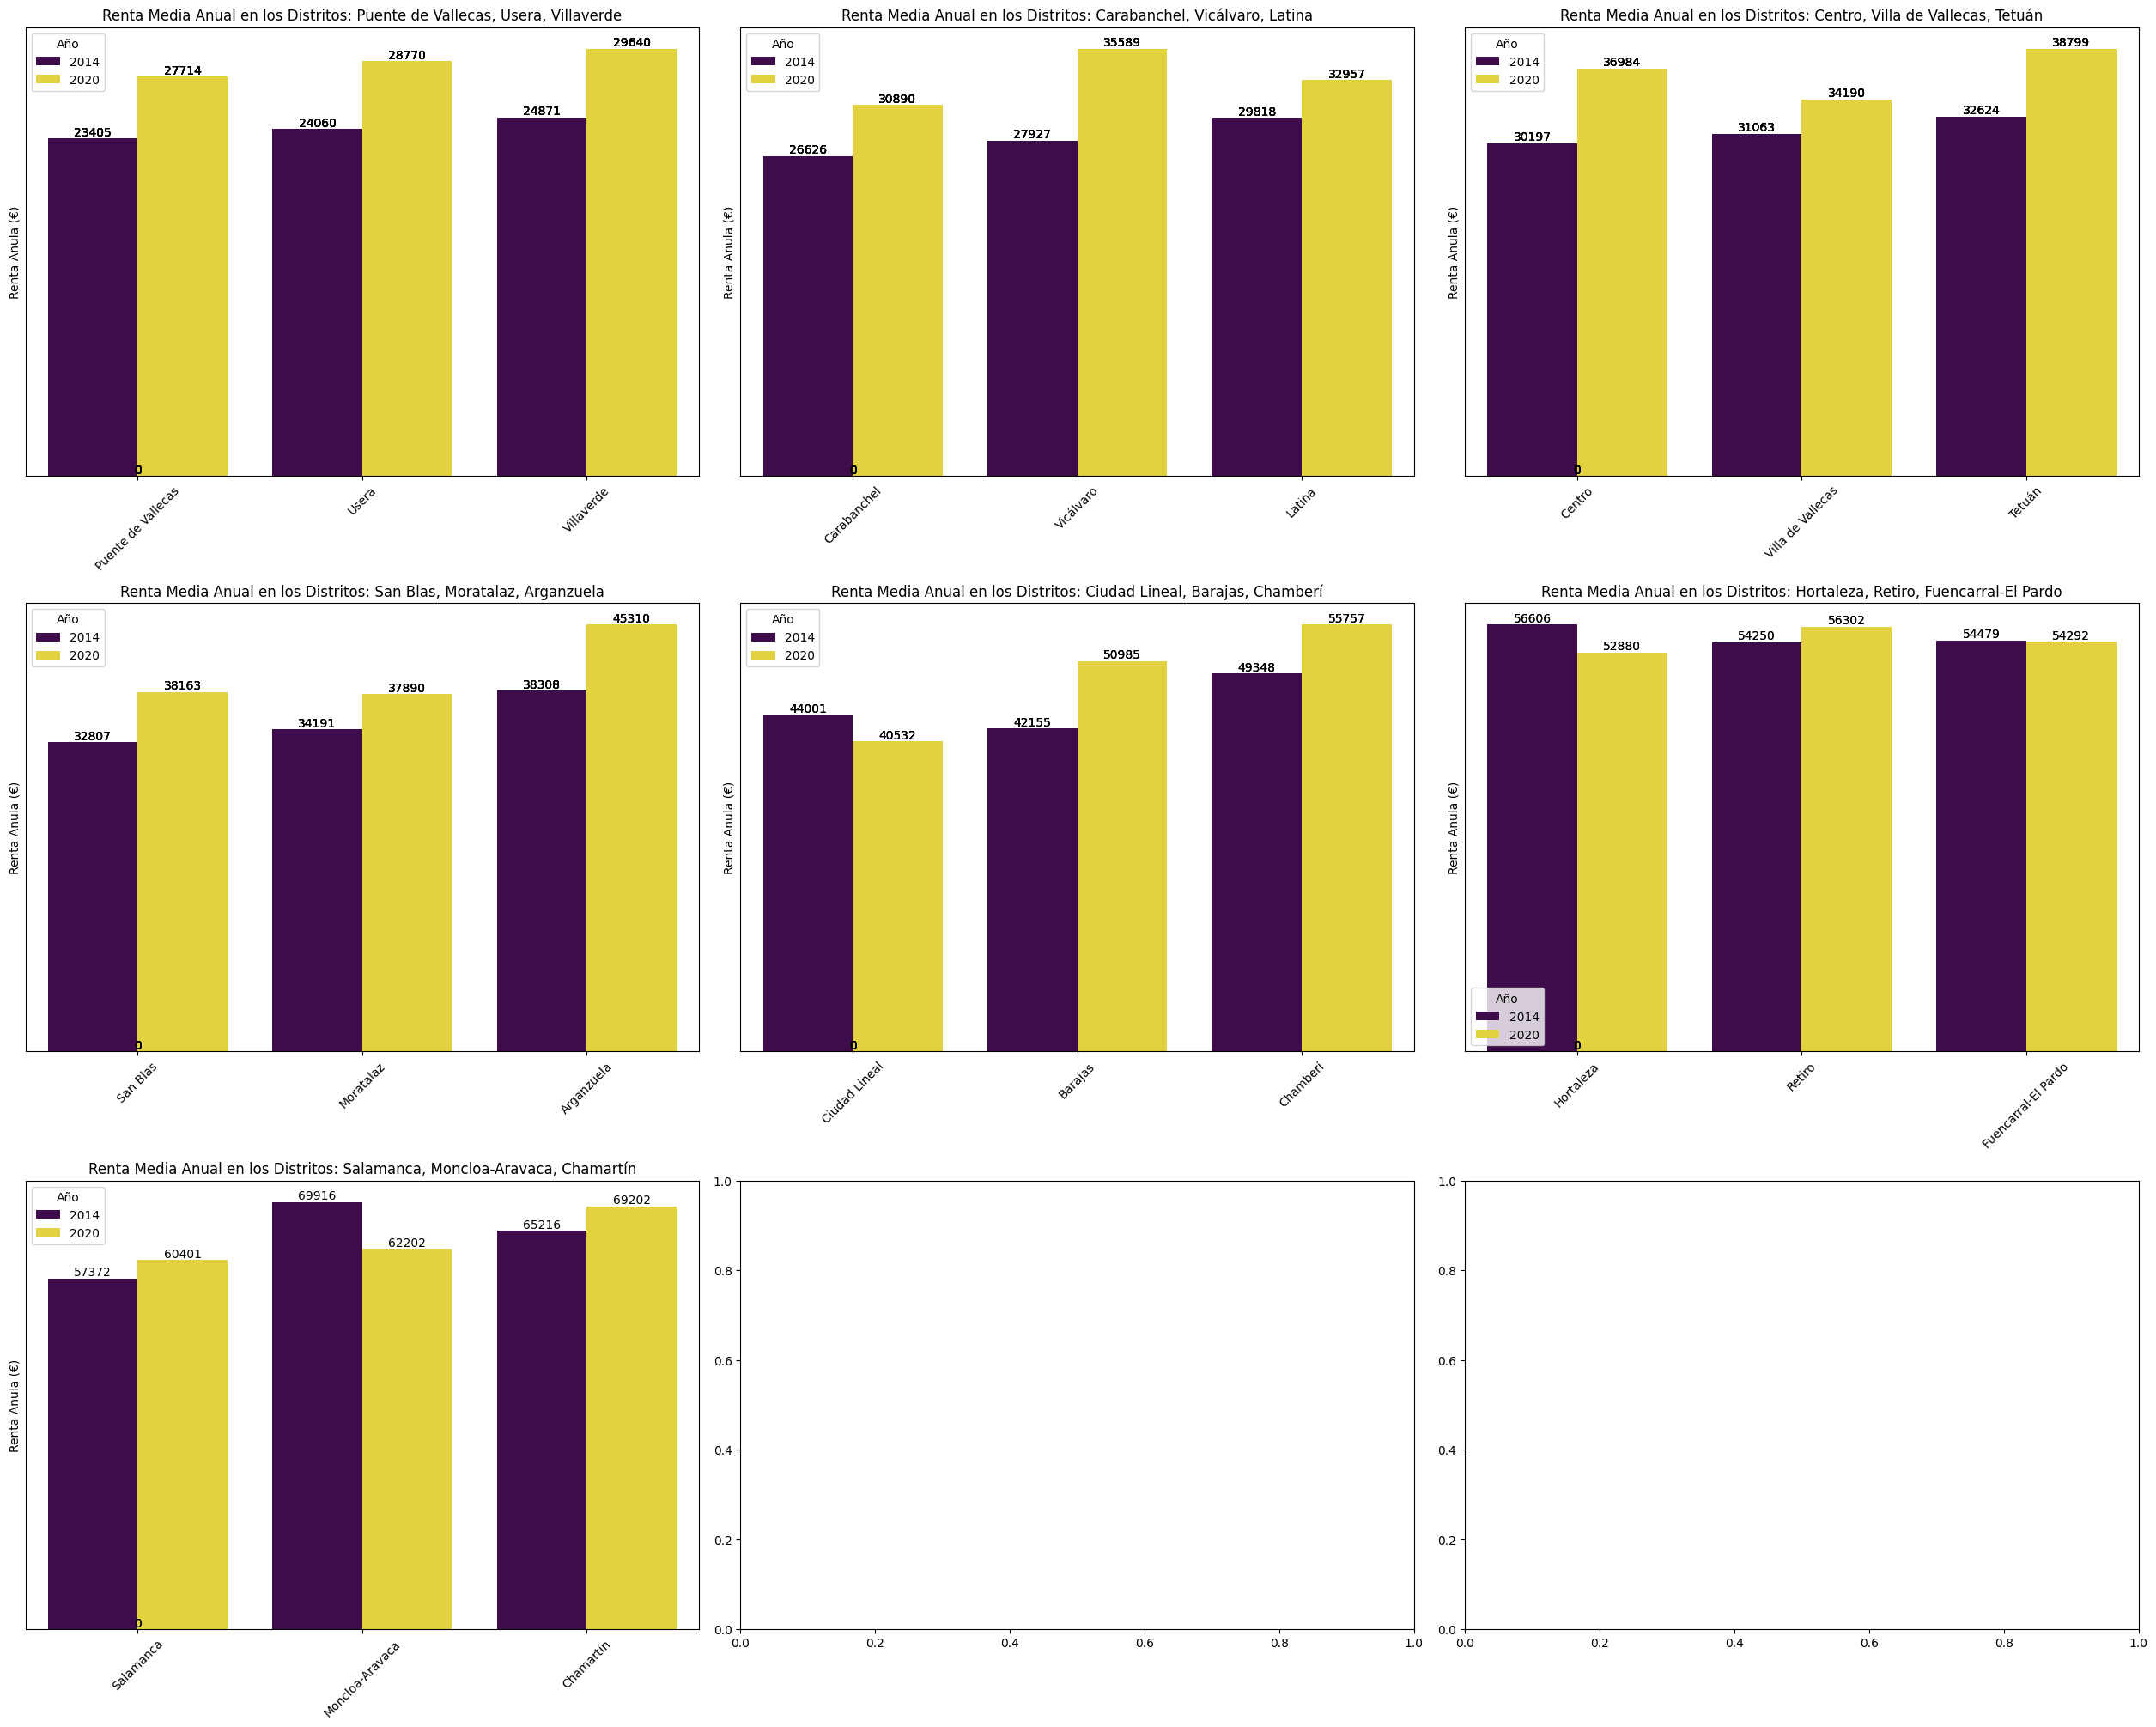

*En la gran mayoría de los distritos ha habido una mejoría en su renta anual del 2014 al 2020, salvo alguna excepción cono en Moncloa-Aravaca, Hortaleza y Ciudad Lineal*

*Entonces, ¿cómo será la tasa de idoneidad por cada distrito?¿Qué distrito tendrá un índice de idoneidad elevado?¿Y el más bajo?* 

> Haremos un análisis entre la tasa de idoneidad, niveles, distrito y curso escolar de los 3 distritos con mayor renta y los 3 distritos con menor renta

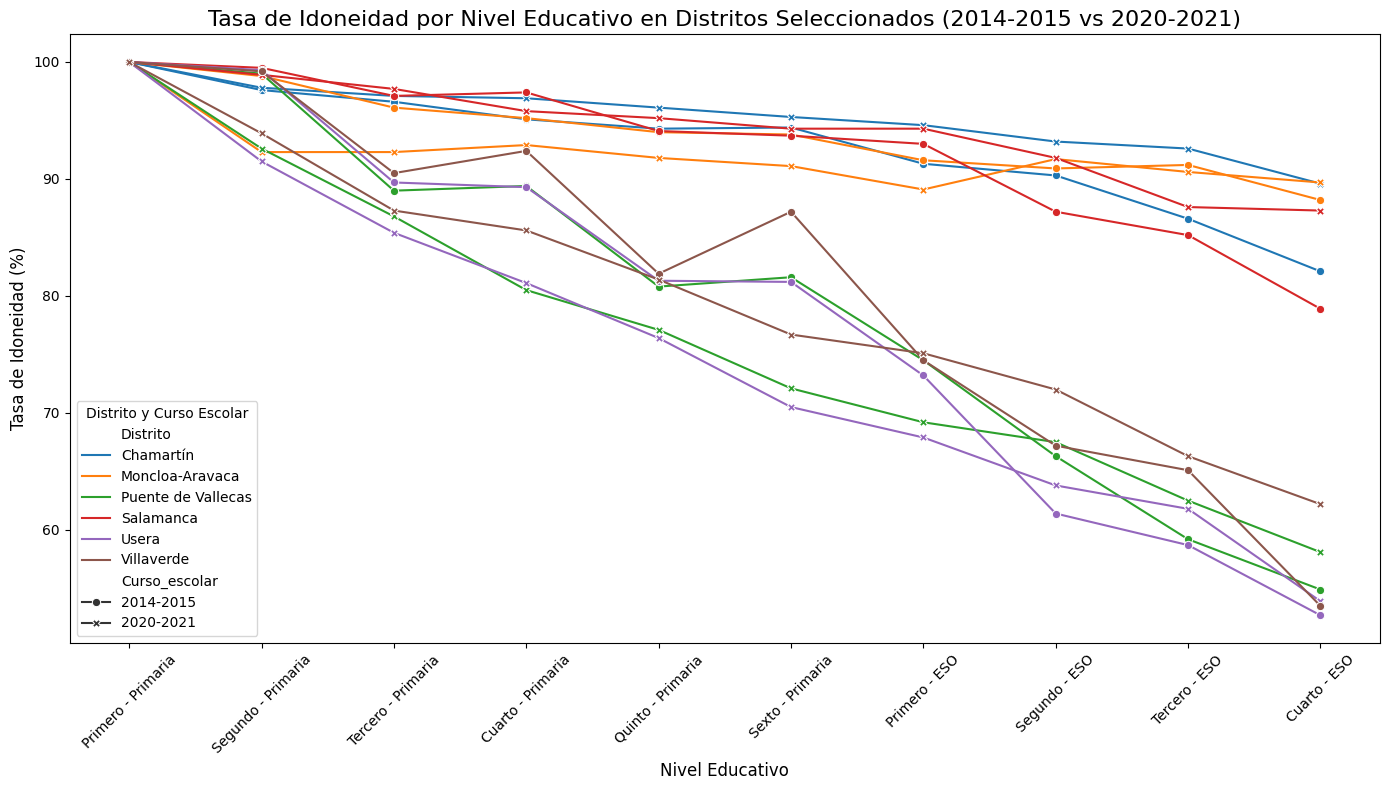

*Se aprecia como los 3 distritos con mayor renta anual, su tasa de idoneidad permanecen elevadas por lo tanto, sus líneas no descienden mucho. Sin embargo, los 3 distritos con menor renta, sus lineas descienden queriendo decir que su tasa de idoneidad baja. Además, se observa que la línea que representa al año 2020-2021, está por encima de la línea del curso 2014-2015 ya que observamos que en ese año, los ingresos fueron más elevados* 

### **5. TEST DE CORRELACIÓN DE PEARSON**

El test de correlación de Pearson, también conocido como el **coeficiente de correlación de Pearson** (r), es una medida estadística que evalúa la fuerza y la dirección de la relación lineal entre dos variables cuantitativas. Este coeficiente fue desarrollado por Karl Pearson a finales del siglo XIX y es una de las herramientas más utilizadas en el análisis estadístico.

El coeficiente de correlación de Pearson es un valor que varía entre *−1 y 1*:

- 𝑟 = 1: Indica una correlación positiva perfecta. Esto significa que, a medida que una variable aumenta, la otra variable también lo hace de manera proporcional y exacta.

- 𝑟 = −1: Indica una correlación negativa perfecta. Aquí, a medida que una variable aumenta, la otra variable disminuye de manera proporcional y exacta.

- 𝑟 = 0: Indica que no hay correlación lineal entre las dos variables. Las variables pueden no tener relación alguna o podrían estar relacionadas de manera no lineal.

En este caso, realizaremos este test de correlación entre nuestras variables directoras: `Renta` y `Tasa_idoneidad_%`.

El resultado es de --> 0.44

*Este resultado, significa que tiene una correlación positiva, es decir, a medida que aumenta la renta anual media, también tiende a aumentar la tasa de idoneidad. Esto sugiere que los distritos con mayor renta media anual suelen tener tasas de idoneidad más altas.*

*Sin embargo, la correlación no es tan fuerte como para afirmar que la renta es el único o principal factor determinante de la tasa de idoneidad. Puede influir otros factores como la calidad de la educación, infraestructuras, políticas educativas... Aunque es lo suficientemente significativa como para indicar una relación directa entre ambas variables.*

**Por lo tanto, afirmamos nuestra hipótesis, es decir, las familias que tienen mayor nivel económico tienen una mayor progresión en sus estudios**

**Además, podemos añadir que después del confinamiento ha habido una mejora económica de manera global, contra todo pronóstico. Y como consecuencia, ha habido una mejora en la progresión a nivel académico. Hay que destacar que estos datos es de manera generalizada habiendo casos particulares excepcionales.**